In [1]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.constant import *
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN 
from hnmchallenge.data_reader import DataReader
import datetime


In [2]:
dataset = FilterdDataset()
dr = DataReader()

In [3]:
fd = dr.get_filtered_full_data()

In [4]:
fd_filtered = fd[~fd[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].duplicated()]

In [5]:
fd_filtered

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,0,0,0.008458,2
2,2018-09-20,1,1,0.033881,1
3,2018-09-20,2,2,0.021593,1
4,2018-09-20,3,3,0.022017,2
6,2018-09-20,4,4,0.032186,2
...,...,...,...,...,...
14361082,2020-09-22,59779,9279,0.042356,2
14361083,2020-09-22,198005,20308,0.059305,2
14361085,2020-09-22,798833,21707,0.043203,1
14361086,2020-09-22,395317,4994,0.006763,1


In [6]:
count = fd.groupby(DEFAULT_ITEM_COL).count()

In [7]:
count

,t_dat,customer_id,price,sales_channel_id
article_id,,,,
0,3829,3829,3829,3829
1,2409,2409,2409,2409
2,1210,1210,1210,1210
3,2052,2052,2052,2052
4,5848,5848,5848,5848
...,...,...,...,...
22064,1,1,1,1
22065,1,1,1,1
22066,2,2,2,2


In [16]:
count["price"].sort_values(ascending=False)

article_id
1638     50287
1482     35043
130      31718
11       30199
2375     26329
         ...  
21753        1
20954        1
20956        1
21749        1
22068        1
Name: price, Length: 22069, dtype: int64

In [22]:
count_sorted = count.sort_values(by="price",ascending=False)

In [23]:
count_sorted

,t_dat,customer_id,price,sales_channel_id,cum_sum
article_id,,,,,
1638,50287,50287,50287,50287,50287
1482,35043,35043,35043,35043,85330
130,31718,31718,31718,31718,117048
11,30199,30199,30199,30199,147247
2375,26329,26329,26329,26329,173576
...,...,...,...,...,...
21753,1,1,1,1,14361084
20954,1,1,1,1,14361085
20956,1,1,1,1,14361086


In [24]:
count_sorted["cum_sum"] = count_sorted["price"].cumsum(axis=0)

In [25]:
count_sorted

,t_dat,customer_id,price,sales_channel_id,cum_sum
article_id,,,,,
1638,50287,50287,50287,50287,50287
1482,35043,35043,35043,35043,85330
130,31718,31718,31718,31718,117048
11,30199,30199,30199,30199,147247
2375,26329,26329,26329,26329,173576
...,...,...,...,...,...
21753,1,1,1,1,14361084
20954,1,1,1,1,14361085
20956,1,1,1,1,14361086


In [28]:
count_sorted["cum_sum"] = count_sorted["cum_sum"]/count_sorted["cum_sum"].max()

In [29]:
count_sorted

,t_dat,customer_id,price,sales_channel_id,cum_sum
article_id,,,,,
1638,50287,50287,50287,50287,0.003502
1482,35043,35043,35043,35043,0.005942
130,31718,31718,31718,31718,0.008150
11,30199,30199,30199,30199,0.010253
2375,26329,26329,26329,26329,0.012087
...,...,...,...,...,...
21753,1,1,1,1,1.000000
20954,1,1,1,1,1.000000
20956,1,1,1,1,1.000000


In [31]:
cum_sum_arr = count_sorted["cum_sum"].values

In [32]:
cum_sum_arr

array([0.00350161, 0.00594175, 0.00815036, ..., 0.99999986, 0.99999993,
       1.        ])

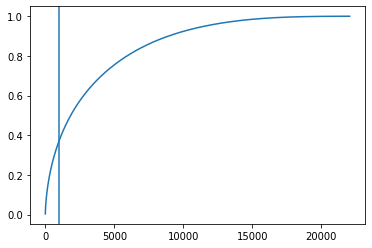

In [38]:
plt.plot(np.arange(len(cum_sum_arr)), cum_sum_arr)
plt.axvline(x=1000)

In [39]:
dr.get_transactions()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,0685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,0891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,0918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,0833459002,0.006763,1
